In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding = "cp1252")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## data cleaning

## get imformation about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## here last three colums have most of null value so we can drop this columns
df.drop(columns =["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
## rename columns
""" here v1 and v2 is not descriptive therefore rename the column v1 as taeget or rename the column v2 as text and this is this permanent changes
therfore we use inplace = true for saving the changes"""

df.rename(columns = {"v1":"target","v2":"text"},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
""" here labelencoding is used for converting the string into nemerical form scikitlearn doesn't accept the string value therefor before applying the 
machine learning model we have to convert string into numeric data"""

## and in this case we apply encoding on the target column therefore  labelencoding is used

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [12]:
df["target"]=encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
## null values

"""is used to count missing values (null or NaN) in each column of a DataFrame. It helps identify where data is missing, showing how many null values
exist in every column"""

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
## dublicated values
df.duplicated().sum()

403

In [16]:
## remove dublicates
""" ittis used to remove duplicate rows from a DataFrame, keeping only the first occurrence of each duplicated row. It helps in cleaning the data by 
removing repeated entries"""
df = df.drop_duplicates(keep = "first")

In [17]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df.duplicated().sum()

0

## EDA

In [20]:
"""is used to count the frequency of unique values in the "target" column of a DataFrame. It helps you understand how many times each category or 
value appears, which is useful for checking class distribution in classification tasks."""
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

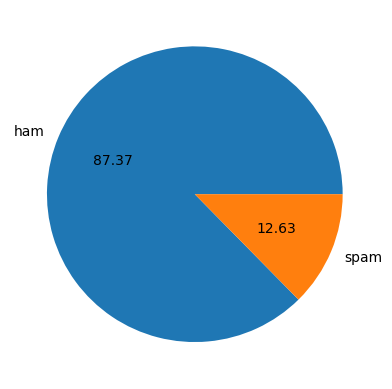

In [21]:
"""This code creates a pie chart using Matplotlib to visualize the distribution of values in the "target" column of a DataFrame. 
The labels=["ham", "spam"] specify the categories, and autopct="%0.2f" displays the percentage of each category with two decimal places. It's used to 
visually compare the proportions of "ham" (non-spam) and "spam" messages."""

import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [22]:
df["char_count"]=df["text"].apply(len)

C:\Users\Komal\AppData\Local\Temp\ipykernel_6920\1152397323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_count"]=df["text"].apply(len)


In [23]:
df.head()

,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
"""The NLTK (Natural Language Toolkit) library is used for  text processing tasks like tokenization, removing stop words, and stemming. 
It helps clean and prepare text data, making it easier for machine learning models to analyze and classify emails or messages as spam or not."""

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
"""This code adds a new column word_count to the DataFrame by counting the number of words in each message in the text column using NLTK's word tokenizer."""
df["word_count"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Komal\AppData\Local\Temp\ipykernel_6920\1375869362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:

"""This line of code adds a new column called sencount to the DataFrame df, where each entry counts the number of sentences in the corresponding 
text from the text column using NLTK's sentence tokenizer."""

df["sencount"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Komal\AppData\Local\Temp\ipykernel_6920\1314324871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sencount"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:

df.head()

,target,text,char_count,word_count,sencount
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#ham
"""This code filters the DataFrame df to include only rows where the target column equals 0, then provides summary 
statistics (like count, mean, min, max) for the char_count, word_count, and sencount columns of those filtered rows."""
df[df["target"] == 0][["char_count","word_count","sencount"]].describe()


,char_count,word_count,sencount
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
"""This code filters the DataFrame df to include only rows where the target column equals 1, and then it provides summary statistics (like count, mean, min, max) for the char_count, word_count, and
sencount columns of those filtered rows."""

df[df["target"] == 1][["char_count","word_count","sencount"]].describe()

,char_count,word_count,sencount
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

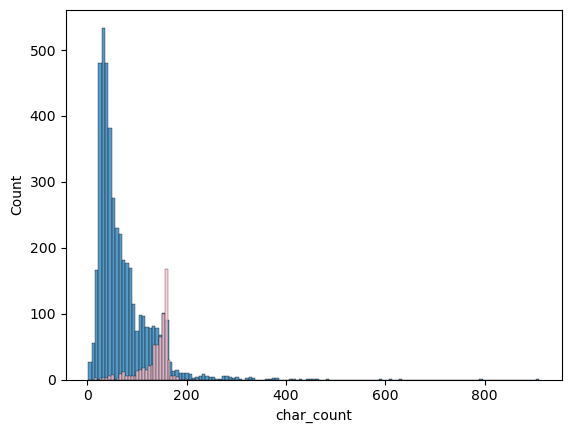

In [34]:
##This code creates two overlapping histograms to compare the distribution of char_count for rows where target is 0 and 1.
sns.histplot(df[df["target"]==0]["char_count"])
sns.histplot(df[df["target"]==1]["char_count"],color="pink")
plt.show()

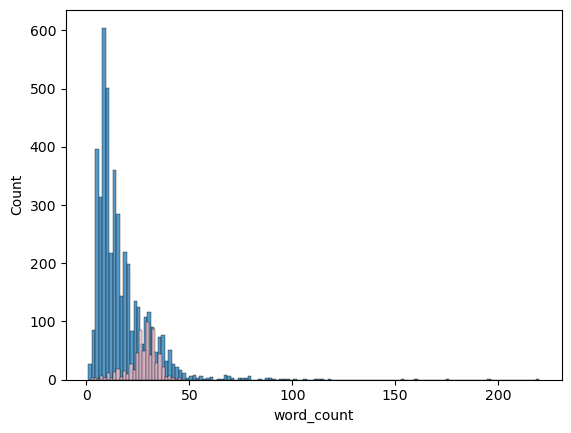

In [35]:
"""This code snippet creates two overlapping histograms to visualize and compare the distribution of word_count for rows where target is 0 and 1. However, 
the second half of the code repeats the same histograms without any changes."""

sns.histplot(df[df["target"]==0]["word_count"])
sns.histplot(df[df["target"]==1]["word_count"],color="pink")
plt.show()

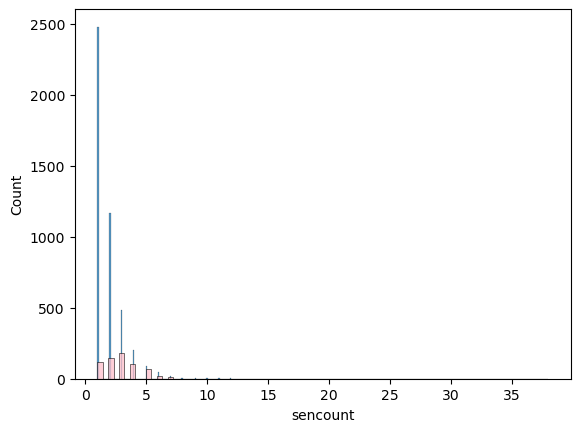

In [36]:
sns.histplot(df[df["target"]==0]["sencount"])
sns.histplot(df[df["target"]==1]["sencount"],color="pink")
plt.show()

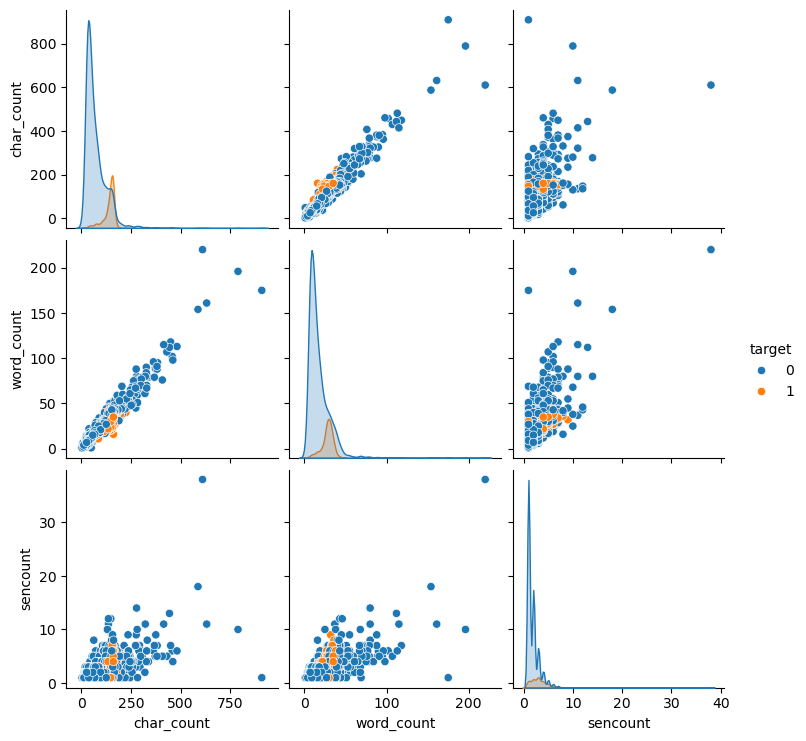

In [37]:
sns.pairplot(df,hue="target")
plt.show()

In [38]:
df1 = df.copy()

In [39]:
df1

,target,text,char_count,word_count,sencount
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [40]:
df1 = df1.drop(columns="text")
df1.head()

,target,char_count,word_count,sencount
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [41]:
df1.corr()

,target,char_count,word_count,sencount
target,1.000000,0.384717,0.262912,0.263939
char_count,0.384717,1.000000,0.965760,0.624139
word_count,0.262912,0.965760,1.000000,0.679971
sencount,0.263939,0.624139,0.679971,1.000000


<Axes: >

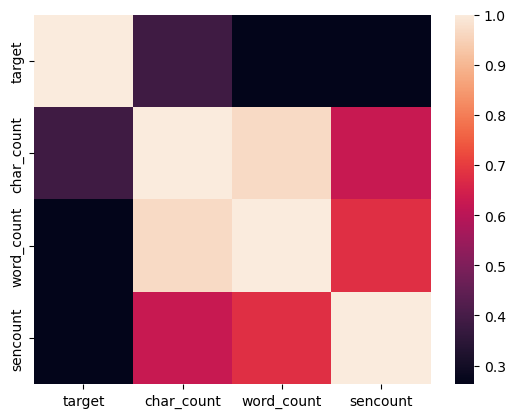

In [42]:
sns.heatmap(df1.corr())

## Data Preprocessing



In [44]:
##Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [45]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
transform_text("MY NAME IS KOMAL%%")

'name komal'

In [50]:
df["transform_text"] = df["text"].apply(transform_text)

C:\Users\Komal\AppData\Local\Temp\ipykernel_6920\3140994326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transform_text"] = df["text"].apply(transform_text)


In [51]:
df

,target,text,char_count,word_count,sencount,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [52]:
!pip install wordcloud


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

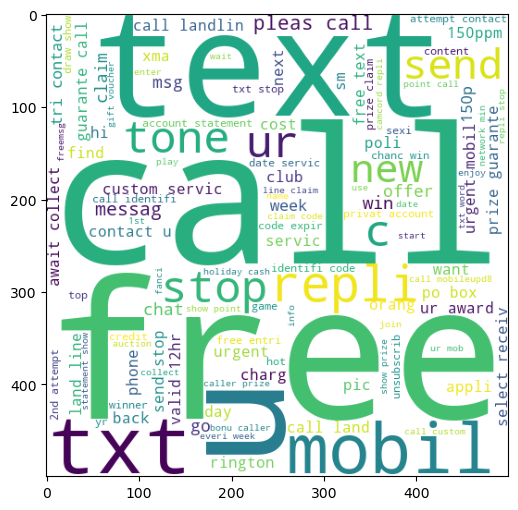

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

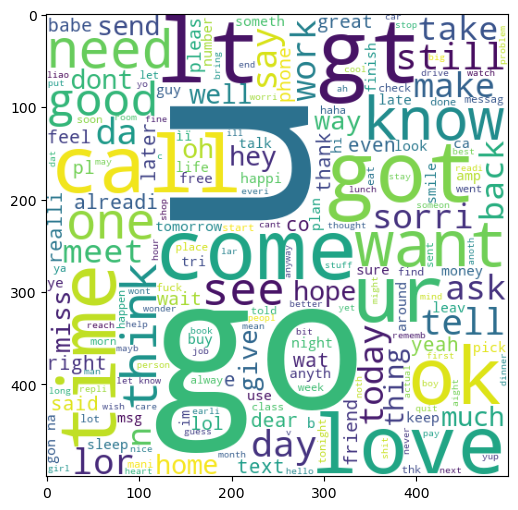

In [57]:
plt.figure(figsize =(15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df["target"] == 1]["transform_text"].tolist():
       for word in msg.split():
           spam_corpus.append(word)

In [59]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [60]:
len(spam_corpus)

9939

In [61]:
!pip install collection


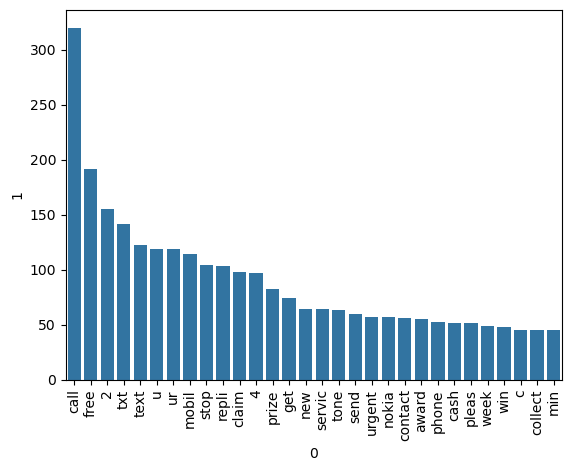

In [62]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus = []
for msg in df[df["target"] == 0]["transform_text"].tolist():
       for word in msg.split():
           ham_corpus.append(word)

In [64]:
len(ham_corpus)

35404

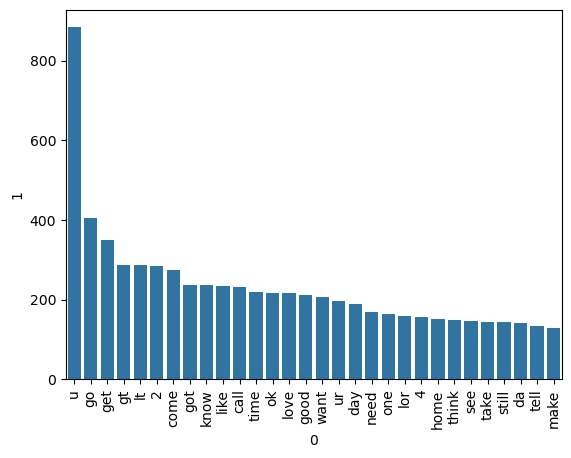

In [65]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["transform_text"]).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y = df["target"].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [76]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [77]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [78]:
#tfidf -> mnb

In [79]:
""" overfitting is occure when max_depth is high and underfitting is occure when max_depth is very less"""

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion ="entropy",max_depth = None)
clf = clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9497098646034816
[[873  23]
 [ 29 109]]
0.8257575757575758


In [80]:
!pip install xgboost

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
"""clf = clf.fit(X_train,y_train)
svc = svc.fit(X_train,y_train)
knc = knc.fit(X_train,y_train)
mnb = mnb.fit(X_train,y_train)
dtc = dtc.fit(X_train,y_train)
lrc = lrc.fit(X_train,y_train)
rfc = rfc.fit(X_train,y_train)
abc = abc.fit(X_train,y_train)
bc = bc.fit(X_train,y_train)
etc = etc.fit(X_train,y_train)
gbdt = gbdt.fit(X_train,y_train)
xgb = xgb.fit(X_train,y_train)"""

'clf = clf.fit(X_train,y_train)\nsvc = svc.fit(X_train,y_train)\nknc = knc.fit(X_train,y_train)\nmnb = mnb.fit(X_train,y_train)\ndtc = dtc.fit(X_train,y_train)\nlrc = lrc.fit(X_train,y_train)\nrfc = rfc.fit(X_train,y_train)\nabc = abc.fit(X_train,y_train)\nbc = bc.fit(X_train,y_train)\netc = etc.fit(X_train,y_train)\ngbdt = gbdt.fit(X_train,y_train)\nxgb = xgb.fit(X_train,y_train)'

In [84]:
"""y_pred5 = knc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))"""

'y_pred5 = knc.predict(X_test)\nprint(accuracy_score(y_test,y_pred5))\nprint(confusion_matrix(y_test,y_pred5))\nprint(precision_score(y_test,y_pred5))'

In [85]:
"""y_pred6 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))"""

'y_pred6 = mnb.predict(X_test)\nprint(accuracy_score(y_test,y_pred6))\nprint(confusion_matrix(y_test,y_pred6))\nprint(precision_score(y_test,y_pred6))'

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\Komal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [100]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0
